In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

from jit_model.jit_model import JitModel



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
boston = load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)

y = boston.target
X = np.array(data)
y = zscore(y)
X = zscore(X)

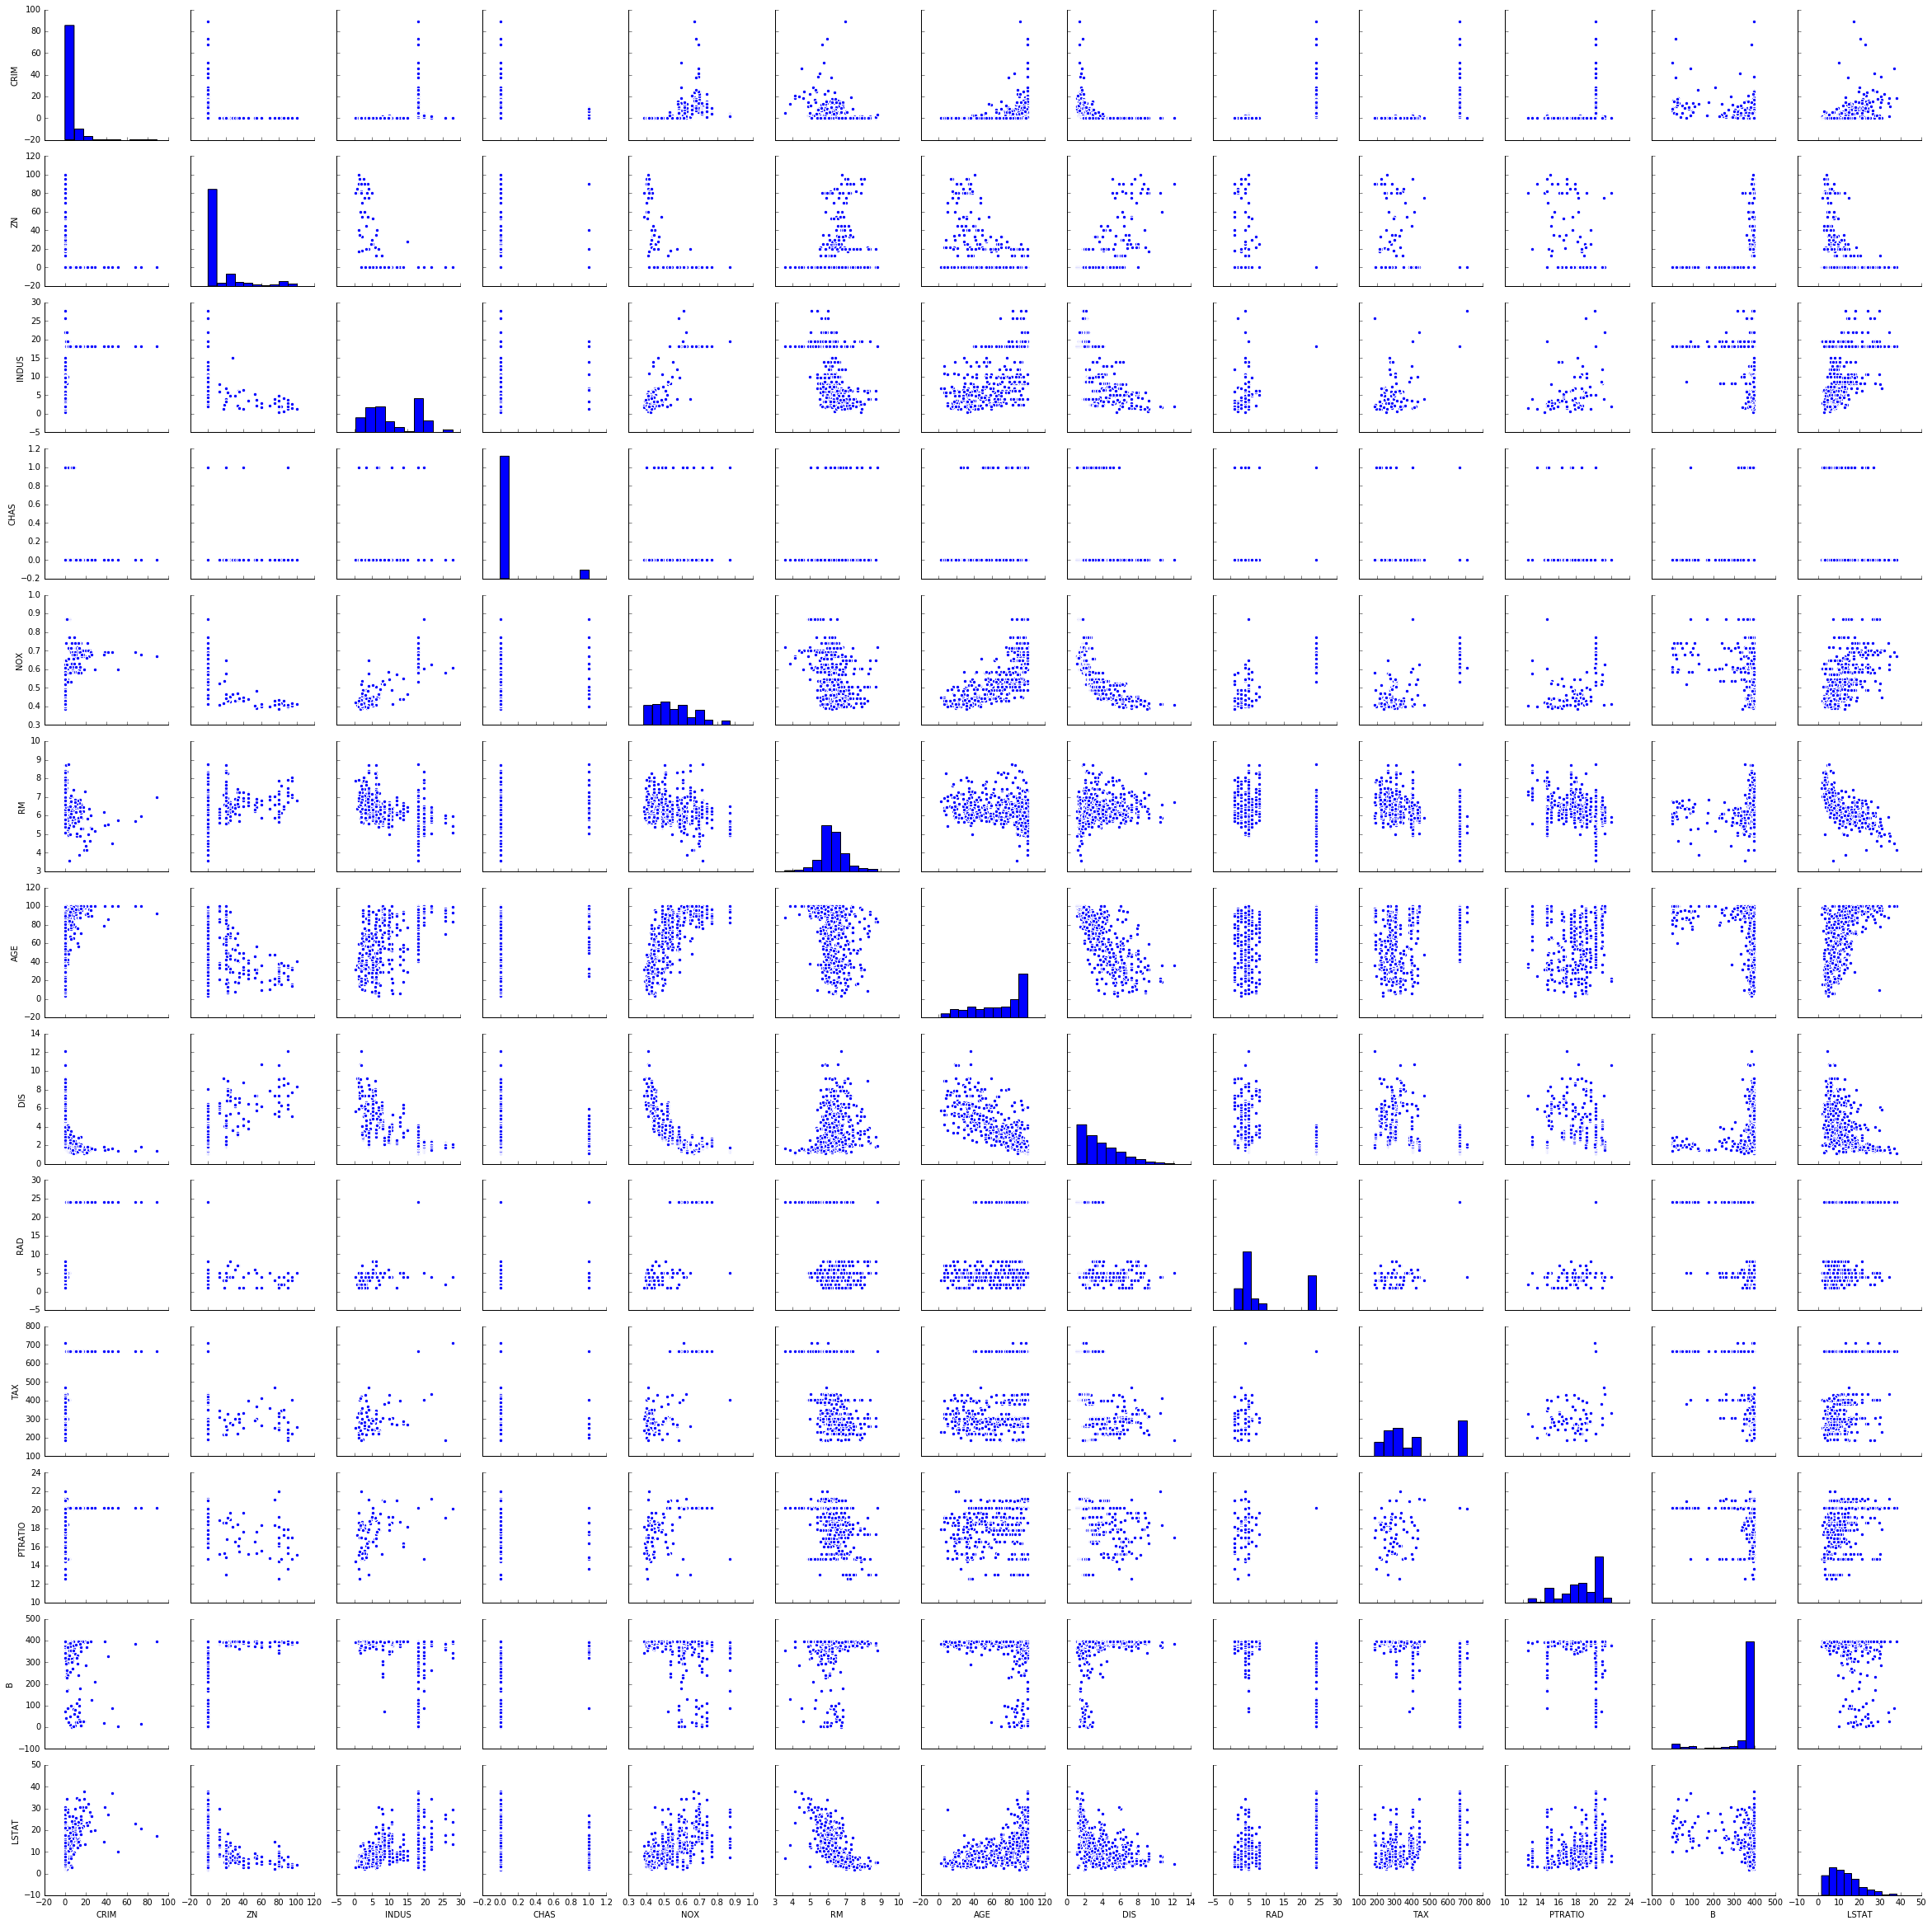

In [14]:
sns.pairplot(data)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

13it [00:00, 130.00it/s]D:\Users\YA65927.YAMATAKE\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 16 iterations, alpha=5.552e-02, previous alpha=1.354e-02, with an active set of 11 regressors.
  ConvergenceWarning)
334it [00:02, 130.62it/s]D:\Users\YA65927.YAMATAKE\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 16 iterations, alpha=1.573e-02, previous alpha=1.069e-02, with an active set of 11 regressors.
  ConvergenceWarning)
354it [00:02, 130.10it/s]
152it [00:01, 107.71it/s]


0.14233147918674285
0.24590880544947655
0.8668281927148035


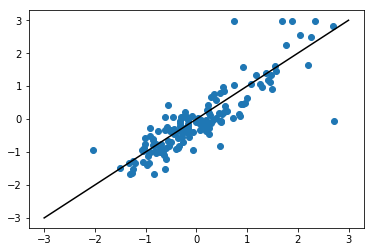

In [6]:
model = JitModel().fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
plt.plot(y_test_hat,y_test,"o")
plt.plot([-3,3],[-3,3],"k-")

print(mean_squared_error(y_train_hat,y_train))
print(mean_squared_error(y_test_hat,y_test))
print(np.corrcoef(y_test_hat,y_test)[0,1])

<Container object of 13 artists>

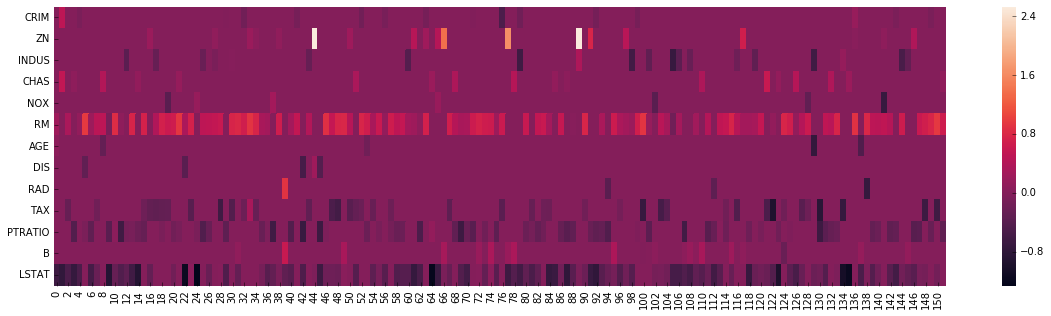

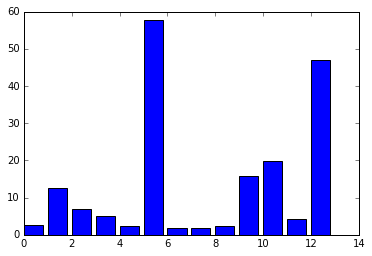

In [177]:
fis = [res["feature_indices"] for res in model.results_]
ws = [res["coef"] for res in model.results_]

C = np.zeros((X.shape[1],y_test.size))
for idx in range(y_test.size):
    C[fis[idx],idx] = ws[idx]

Cdf = pd.DataFrame(C.T,columns=boston.feature_names)

plt.figure(figsize=(20,5))
sns.heatmap(Cdf.T)
plt.figure()
plt.bar(range(X.shape[1]),np.abs(C).sum(axis=1))

In [173]:
model.results_[78]["local_indices"]

array([ 12,  40,  44,  45,  62,  78,  81,  89, 102, 107, 122, 134, 135,
       137, 159, 180, 184, 195, 199, 225, 234, 272, 274, 279, 287, 292,
       301, 309, 311, 314, 327, 334, 342, 353])

0.239635055805
0.338455456872
0.80504695151


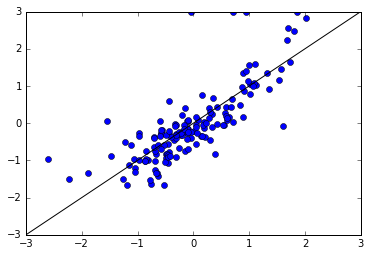

In [162]:
from sklearn.linear_model import LinearRegression,ElasticNetCV,LassoCV,Lasso
# lm = LinearRegression()
lm = ElasticNetCV(cv=10)
# lm = LassoCV(cv=10)
# lm = Lasso(alpha=0.01)
y_train_hat = lm.fit(X_train,y_train).predict(X_train)
y_test_hat = lm.fit(X_train,y_train).predict(X_test)
plt.plot(yhat2,y_test,"o") 
plt.plot([-3,3],[-3,3],"k-")

print(mean_squared_error(y_train_hat,y_train))
print(mean_squared_error(y_test_hat,y_test))
print(np.corrcoef(y_test_hat,y_test)[0,1])

<Container object of 13 artists>

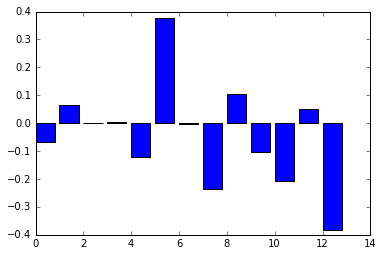

In [124]:
plt.bar(range(X.shape[1]),lm.coef_)

0.0173237838734
0.167298700311
0.910022013446


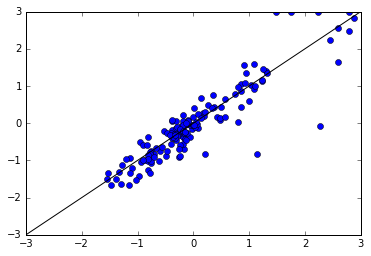

In [161]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500)
y_train_hat = rf.fit(X_train,y_train).predict(X_train)
y_test_hat = rf.fit(X_train,y_train).predict(X_test)
plt.plot(y_test_hat,y_test,"o") 
plt.plot([-3,3],[-3,3],"k-")

print(mean_squared_error(y_train_hat,y_train))
print(mean_squared_error(y_test_hat,y_test))
print(np.corrcoef(y_test_hat,y_test)[0,1])

<Container object of 13 artists>

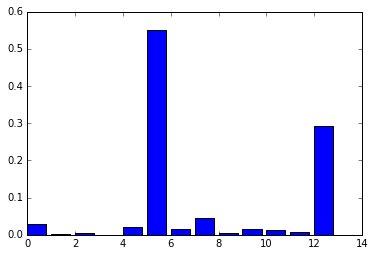

In [160]:
plt.bar(range(X.shape[1]),rf.feature_importances_)